**Nombres:**

Agustín López Penney

Joaquín Salva

Juan Quintero

# Práctica 1: Reconocimiento de dígitos manuscritos con extracción manual de características

El nuevo banco "First bank of Wiki" desea implementar un sistema de reconocimiento automático de cheques como el siguiente:

![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/b/b9/CanadianChequeSample.png)


Actualmente, el banco cuenta con un sistema capaz de aislar los dígitos y convertirlos en imágenes de 8 x 8, pero no de reconocer de qué dígito se trata. Por esa razón, nos ha solicitado realizar un módulo capaz de reconocer dígitos manuscritos dada una imagen de 8 x 8 pixeles:


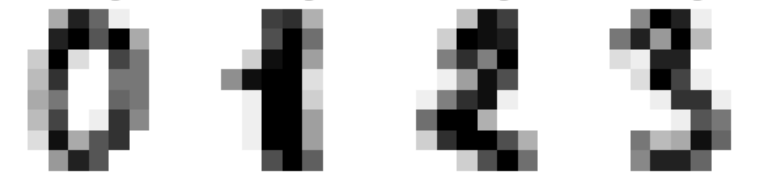



# Cargando los datos

Primero vamos a cargar el dataset y visualizar algunos dígitos.

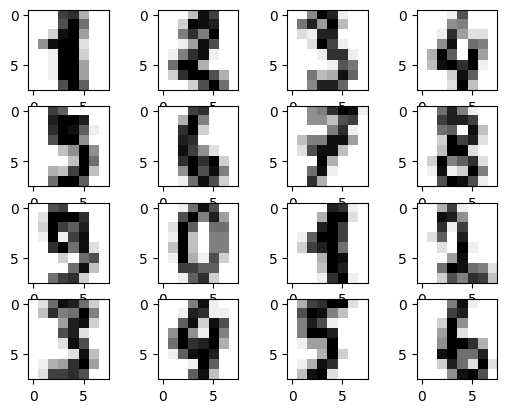

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(digits.images[i,:,:], cmap=plt.get_cmap('gray_r'))


# Binarizando el problema

Para comenzar con un problema más simple, sólo trabajaremos en el escenario de clasificación binaria para dígitos 0 y 1. Para eso, primero filtramos los datos y luego los particionamos en training y test folds.

In [ ]:
# Cargo los dígitos
X, y = load_digits(return_X_y=True)
X, y = digits.images, digits.target

# Filtro los que sean 0 o 1
indices = np.array(range(X.shape[0]))
bin_indices = indices[(y==0) | (y == 1)]

X_bin = X[bin_indices,:,:]
y_bin = y[bin_indices]

# Creo los splits para training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.33, random_state=42)

print("Total de datos para clasificación entre 10 dígitos: " + str(y.shape[0]))
print("Total de datos para clasificación binaria: " + str(y_bin.shape[0]))
print("Total de 1s para clasificación binaria: " + str(y_bin_test.sum()))
print("Total de 0s para clasificación binaria: " + str(y_bin_test.shape[0] - y_bin_test.sum()))


Total de datos para clasificación entre 10 dígitos: 1797
Total de datos para clasificación binaria: 360
Total de 1s para clasificación binaria: 60
Total de 0s para clasificación binaria: 59


Visualizamos ahora los dígitos del problema binario

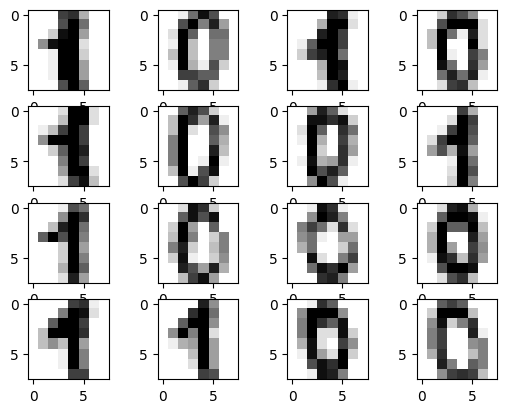

In [ ]:
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X_bin[i,:,:], cmap=plt.get_cmap('gray_r'))

# Entrenando un perceptrón simple con extracción manual de características para clasificación binaria

Ahora procederemos a entrenar un perceptrón usando la biblioteca Scikit Learn. Esta biblioteca de aprendizaje automático implementa muchísimos modelos listos para usar. En este caso, usaremos el perceptrón simple `sklearn.linear_model.Perceptron`

Pero antes de definir el perceptrón, vamos a definir el método de extracción de características que transformará una imagen (`np.array`) de 8 x 8 en un vector unidimensional de 2 componentes. Para ello, podemos probar con dos estrategias diferentes (si se les ocurre alguna otra, adelante!):

* **Estrategia 1:** vamos a considerar la feature 0 como la media de intensidades de la parte superior del dígito (filas 0 a 3) y y la feature 1 como la media de la parte inferior (filas 4 a 7) tal como indica la imagen:

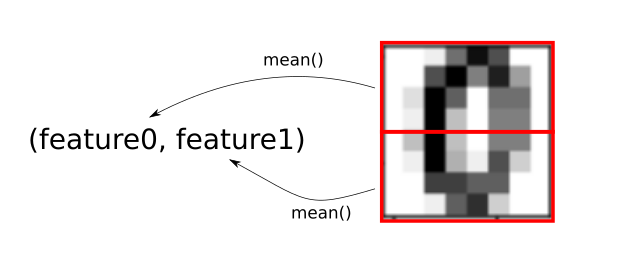

* **Estrategia 2:** Como alternativa, vamos a considerar la feature 0 como la media de toda la imagen, y la feature 1 como el desvío estandar:

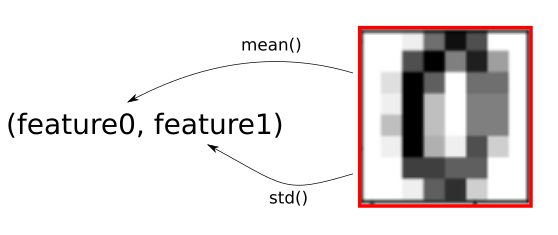


In [ ]:
def extract_features_mean_std(x):
  x_out = np.zeros(shape=(1,2))
  x_out[0,0] = np.mean(x)
  x_out[0,1] = np.std(x)

  return x_out

def extract_features_mean_top_bottom(x):
  x_out = np.zeros(shape=(1,2))

  x_out[0,0] = np.mean(x[:4])
  x_out[0,1] = np.mean(x[4:])

  return x_out

def preprocess_features_mean_std(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_std(X[i,:,:])

  return X_pp

def preprocess_features_mean_top_bottom(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_top_bottom(X[i,:,:])

  return X_pp

Ahora implementamos el perceptrón usando la clase `sklearn.linear_model.Perceptron` y lo entrenamos usando las features elegidas (probar con ambas features y ver cuál da mejor accuracy).

In [ ]:
import sklearn.linear_model
# Definimos un pereceptrón
clasificador = sklearn.linear_model.Perceptron()

# Transformamos las features de los datos para el problema binario
#X_bin_train_features = preprocess_features_mean_std(X_bin_train)
#X_bin_test_features = preprocess_features_mean_std(X_bin_test)
X_bin_train_features = preprocess_features_mean_top_bottom(X_bin_train)
X_bin_test_features = preprocess_features_mean_top_bottom(X_bin_test)

# Entrenamos el clasificador
clasificador.fit(X_bin_train_features,y_bin_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador.score(X_bin_test_features,y_bin_test)))

# Imprimir las predicciones realizadas para los datos de test

print("Predictions: " + str(clasificador.predict(X_bin_test_features)))



Accuracy en test: 0.5378151260504201
Predictions: [0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1
 0 1 1 1 0 1 1 1]


# Visualizando las features

Para entender el grado de discriminabilidad que presentan nuestras features, vamos a visualizarlas. Para hacerlo, colorear los items de cada clase con un color diferente.

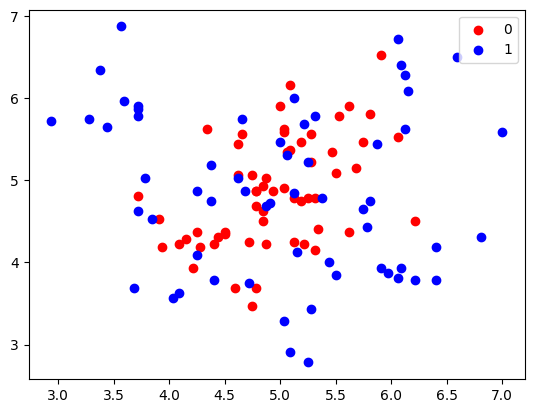

In [ ]:
plt.figure()

plt.scatter(X_bin_test_features[y_bin_test == 0][:,0],X_bin_test_features[y_bin_test == 0][:,1], color="red")
plt.scatter(X_bin_test_features[y_bin_test == 1][:,0],X_bin_test_features[y_bin_test == 1][:,1], color="blue")
plt.legend(["0","1"])

# Complicando las cosas:


Ahora volvemos al caso de 10 dígitos y probamos la misma estrategia que estábamos usando anteriormente.

In [ ]:
# Definimos un pereceptrón
clasificador10 = sklearn.linear_model.Perceptron()

X_train_features =  preprocess_features_mean_std(X_train)
X_test_features = preprocess_features_mean_std(X_test)
#X_train_features =  preprocess_features_mean_top_bottom(X_train)
#X_test_features = preprocess_features_mean_top_bottom(X_test)


clasificador10.fit(X_train_features,y_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador10.score( X_test_features, y_test )))

# Imprimir las predicciones realizadas para los datos de test

print("Predictions: " + str(clasificador10.predict( X_test_features )))


Accuracy en test: 0.13973063973063973
Predictions: [5 8 5 5 5 5 5 5 5 5 5 5 8 8 5 5 8 8 8 8 5 5 8 5 5 5 5 5 5 8 5 8 5 5 5 8 5
 5 5 5 5 5 5 5 5 8 5 8 5 5 8 8 5 8 5 8 5 8 5 5 0 8 8 5 5 8 8 5 8 5 8 5 8 5
 5 5 5 5 5 8 8 5 5 5 8 8 5 5 5 8 5 5 8 5 8 5 5 8 5 8 5 8 5 5 5 5 5 5 5 8 5
 5 5 5 5 5 5 5 8 8 8 5 5 5 5 5 5 5 5 8 8 5 5 5 8 5 5 5 5 8 8 5 5 5 8 5 5 5
 8 5 5 5 8 8 5 8 8 5 5 5 5 5 8 8 5 5 8 5 5 5 8 8 8 5 5 5 5 5 5 5 8 8 8 8 5
 5 5 5 5 8 8 5 5 5 8 5 8 8 5 8 5 8 8 5 8 8 5 8 5 8 8 5 8 5 5 5 5 8 5 5 8 8
 5 8 5 5 5 8 5 5 5 8 5 5 5 5 5 5 5 5 5 8 5 5 8 5 8 8 5 8 5 5 5 8 8 5 5 5 5
 8 5 8 8 5 5 5 5 8 5 8 8 5 5 5 5 5 5 8 5 5 5 5 5 5 8 8 5 8 8 5 5 5 5 5 8 5
 8 5 5 5 8 5 5 5 5 5 8 8 8 8 5 5 5 8 5 8 5 5 5 5 5 8 5 8 5 8 5 5 8 8 5 5 8
 5 8 5 5 8 8 5 5 5 5 8 5 8 5 8 8 5 5 8 5 8 5 5 5 8 8 8 5 8 8 5 5 8 8 8 8 5
 5 8 5 5 5 5 5 5 8 8 5 5 5 8 8 8 5 8 5 8 5 8 8 5 5 5 5 8 5 8 8 5 5 5 5 5 8
 8 5 5 5 5 5 5 8 5 5 8 5 8 5 8 8 5 8 8 5 8 5 5 8 5 5 5 8 8 8 8 8 8 5 5 8 5
 5 5 5 8 5 5 8 5 8 8 5 5 5 8 5 5 5 8 8 5 5 5 5 5 

Para intentar entender por qué disminuye tan drásticamente la performance, visualicen las features de las 10 clases coloreando cada punto en un color diferente como hicimos anteriormente.

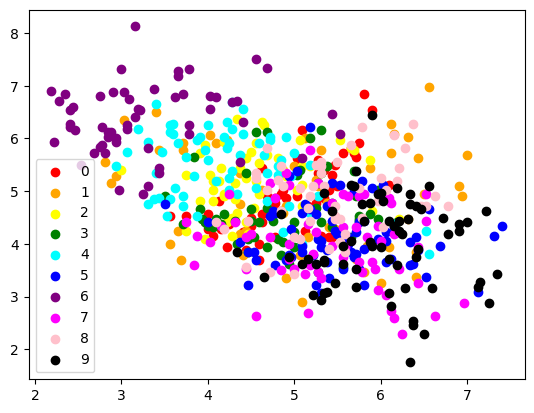

In [ ]:
plt.figure()
i=0
colores = ["red","orange","yellow","green","cyan","blue","purple","magenta","pink","black"]
while(i<10):
    plt.scatter(X_test_features[y_test == i][:,0],X_test_features[y_test == i][:,1],color = colores[i])
    i += 1
plt.legend(["0","1","2","3","4","5","6","7","8","9"])



# Entregable:
* Deberán entregar el Colab completo con el código funcionando. Además, deberán incluir (en el mismo Colab) un pequeño informe donde muestren las visualizaciones de las features, y responder a las siguientes preguntas:

1. ¿Cuál fue la estrategia de extracción de características que mejor te funcionó? Visualizar las features generadas por los extractores implementados y utilizarlas para explicar por qué funcionó mejor esa estrategia.

2. ¿Cuál sería la accuracy para un algoritmo que prediga aleatoriamente las clases en el caso del problema binario si los datos de test estuvieran balanceados? ¿Y en el caso del problema multiclase de 10 dígitos?

3. El clasificador diseñado en cada caso (binario y multiclase), ¿Funcionó mejor que un clasificador aleatorio?



# Respuesta:



1. En el caso de clasificacion binaria, la estrategia de extracción binaria que mejor funcionó fue la de utilizar como features la media juanto al desvio estandar, dando un accuracy de 0.8319, mientras que utilizar como features las medias de la parte superior e inferior de la imagen dio un 0.5378.

  Los graficos nos permiten visualizar el motivo por el cual el método del desvio estandar produce un mayor accuracy score. Esto se debe a que utilizando estas features como los descriptores del 0 y el 1, las 2 etiquetas quedan facilmente "separables" en clusters por una recta.


---


  **mean y STD**

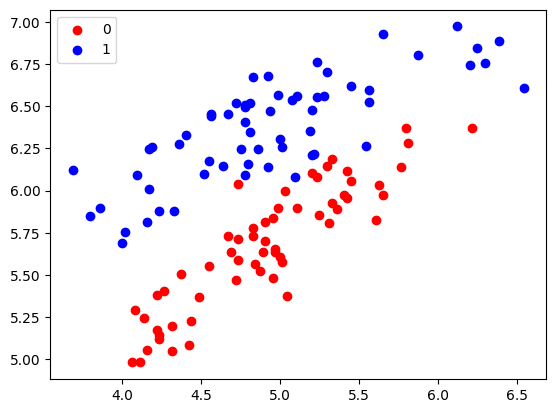

---

**Mean top bottom**

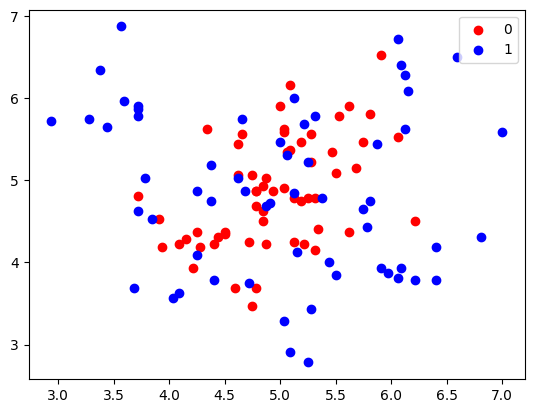

  Sumando la informacion que nos proporciona el otro grafico, vemos que la media como medida presenta mucha variabilidad para ambas etiquetas. Es la inclusion del desvio estandar el que nos permite diferenciar a los numeros, lo queoico debido a que el numero uno tiene pixeles menos dispersos que el 0.


  Por otro lado, en el caso de los 10 dígitos, la estrategia de desviacion estandar da un accuracy de 0.1397 mientras que la estrategia de mean top bottom da 0.1666.

  Al analizar los gráficos podemos llegar a la conclusion de que ninguno de los dos métodos hace un gran trabajo a la hora de diferenciar entre los diferentes números.


---
**Mean y STD**

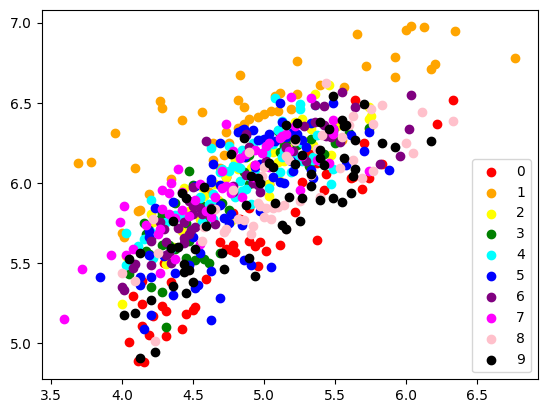

---
**Mean top bottom**

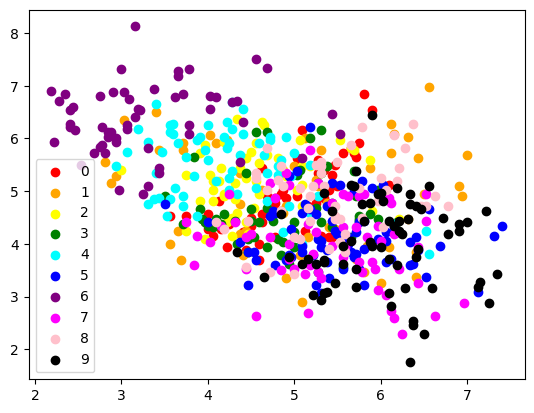

  Ninguno de las dos estrategias otorga unos resultados optimos debido a que se estan utilizando una pequeña cantidad de features que no permiten diferenciar adecuadamente los numeros. Al estudiar los gráficos observamos que en ambos se forma un gran cluster casi indistinguible.

2. El accuracy para un algoritmo que predice aleatoriamente las clases en el problema binario tendria 0,5 de posibilidades de exito si los datos del test estuviesen balanceados. Esto debido a que la probabilidades de que salga el elemento adecuado es 1/(cantidad de clases), como en este caso hay dos clases obtenemos 0,5.

  Por otro lado, en el caso de un algoritmo que predice aleatoriamente entre 10 clases, y utilizando la misma justificacion del problema binario, el accuracy sería de 0,1.


3. En ambos casos (binario y multiclase) y con ambas extracciones de features hemos obtenido resultados que implican que los clasificadores dan mejores resultados que los algoritmos aleatorios.
  
  En el caso binario se observa una mayor diferencia entre los accuracy de las clasificaciones y el algoritmo aleatorio. Mientras que en el caso multiclase la diferencia no es tan notoria, pues la clasificacion suele predecir como mucho 3 clases diferentes, por lo que si tuviera precision perfecta (que no la tiene) tendria 0,3 de precision.
  